In [66]:
import pandas as pd


In [ ]:
# To load the dataframe from the `fortune500.csv` file, you can use the following code:
df = pd.read_csv('dataset/fortune500.csv')
df.head(11)

,Year,Rank,Company,Income,Revenue
0,1955,1,General Motors,9823.5,806
1,1955,2,Exxon Mobil,5661.4,584.8
2,1955,3,U.S. Steel,3250.4,195.4
3,1955,4,General Electric,2959.1,212.6
4,1955,5,Esmark,2510.8,19.1
5,1955,6,Chrysler,2071.6,18.5
6,1955,7,Armour,2056.1,1.6
7,1955,8,Gulf Oil,1705.3,182.8
8,1955,9,Mobil,1703.6,183.8
9,1955,10,DuPont,1687.7,344.4


1. Tính Income trung bình của từng Company qua các Year

In [68]:
mean_income_yearly = df.groupby(['Company', 'Year'])['Income'].mean().reset_index(name='MeanIncome')
mean_income_yearly 

,Company,Year,MeanIncome
0,3Com,1994,617.2
1,3Com,1998,3147.1
2,3Com,1999,5420.4
3,3Com,2000,5772.1
4,3Com,2001,5391.5
...,...,...,...
25446,Zenith Electronics,1991,1414.5
25447,Zenith Electronics,1992,1321.6
25448,Zenith Electronics,1993,1271.4
25449,Zenith Electronics,1994,1228.2


2. Tính Revenue trung bình của từng Company qua các Year

In [69]:
# Ensure the 'Revenue' column is numeric
df['Revenue'] = pd.to_numeric(df['Revenue'], errors='coerce') # convert N.A to NaN 

# Group by 'Company' and calculate the mean of 'Revenue'
mean_revenue_yearly = df.groupby(['Company', 'Year'])['Revenue'].mean().reset_index(name='MeanRevenue')
mean_revenue_yearly

,Company,Year,MeanRevenue
0,3Com,1994,38.6
1,3Com,1998,374.0
2,3Com,1999,30.2
3,3Com,2000,403.9
4,3Com,2001,674.3
...,...,...,...
25446,Zenith Electronics,1991,-63.3
25447,Zenith Electronics,1992,-51.6
25448,Zenith Electronics,1993,-105.9
25449,Zenith Electronics,1994,-97.0


Company by mean Revenue and mean Income

In [70]:
company_mean = pd.merge(mean_income_yearly, mean_revenue_yearly, on=['Company', 'Year'])
company_mean.head()

,Company,Year,MeanIncome,MeanRevenue
0,3Com,1994,617.2,38.6
1,3Com,1998,3147.1,374.0
2,3Com,1999,5420.4,30.2
3,3Com,2000,5772.1,403.9
4,3Com,2001,5391.5,674.3


3. Xác định Company có Income trung bình cao nhất

In [71]:
#? Method 1: retrieve max value by index -> retrieve 1 only 
highest_mean_income_index = company_mean['MeanIncome'].idxmax()
highest_mean_income_company = company_mean.loc[highest_mean_income_index, 'Company']

highest_mean_income_company

'Wal-Mart Stores'

In [72]:
#? Method 2: retrieve max value bu sorting -> can retrieve multiple company if their income is duplpicated 
highest_mean_income = company_mean['MeanIncome'].min()
highest_mean_income_company = company_mean[company_mean['MeanIncome'] == highest_mean_income]
highest_mean_income_company

,Company,Year,MeanIncome,MeanRevenue
6462,Copperweld Steel,1955,49.7,0.9
10619,Goodall-Sanford,1955,49.7,-2.7


In [ ]:
#? Method 3: Retrieve by sorting and .head(1)
highest_mean_income_company = company_mean.sort_values(by='MeanIncome', ascending=False)
highest_mean_income_company.head(1)

,Company,Year,MeanIncome,MeanRevenue
24300,Wal-Mart Stores,2005,288189.0,10267.0


4. Xác định Company có Revenue trung bình thấp nhất

In [74]:
min_revenue = company_mean['MeanRevenue'].min()
lowest_mean_revenue_yearly = company_mean[company_mean['MeanRevenue'] == min_revenue]
lowest_mean_revenue_yearly

,Company,Year,MeanIncome,MeanRevenue
22867,Time Warner,2003,41780.0,-98696.0


5. Tìm Company có Income lớn nhất mỗi Year

In [75]:
highest_income = df['Income'].max()

highest_income_yearly = df.groupby('Year')['Income'].idxmax() # get index of highest Income Company through years
highest_income_yearly = highest_income_yearly.apply(lambda idx: df.loc[idx]) # find company by indexes

6. Tìm những Company thường nằm trong top 5 Company có Income lớn nhất qua mỗi Year

In [76]:
top5_frequent = []


7. Lọc ra 5 Company có Income trung bình thấp nhất

In [ ]:
least_revenue_year = company_mean.sort_values(by='MeanIncome')
least_revenue_year.head(5)

,Company,Year,MeanIncome,MeanRevenue
6462,Copperweld Steel,1955,49.7,0.9
10619,Goodall-Sanford,1955,49.7,-2.7
6756,Cuban-American Sugar,1955,50.1,0.7
3923,Bullard,1955,50.2,4.8
20953,Signal Oil Gas,1955,50.2,9.3


8. Lọc ra 5 Company có Revenue trung bình cao nhất

In [ ]:
top_companies_per_year = company_mean.groupby('Year').apply(lambda x: x.nlargest(5, 'MeanIncome')).reset_index(drop=True)
company_count = top_companies_per_year['Company'].value_counts()
frequent_top_companies = company_count[company_count > 1]
frequent_top_companies[:5]

C:\Users\boboi\AppData\Local\Temp\ipykernel_28500\1849509729.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_companies_per_year = company_mean.groupby('Year').apply(lambda x: x.nlargest(5, 'MeanIncome')).reset_index(drop=True)


Company
General Motors      51
Exxon Mobil         51
Ford Motor          48
General Electric    32
Mobil               19
Name: count, dtype: int64

9. Vẽ biểu đồ so sánh Income trung bình của 5 Company có Income trung bình thấp nhất

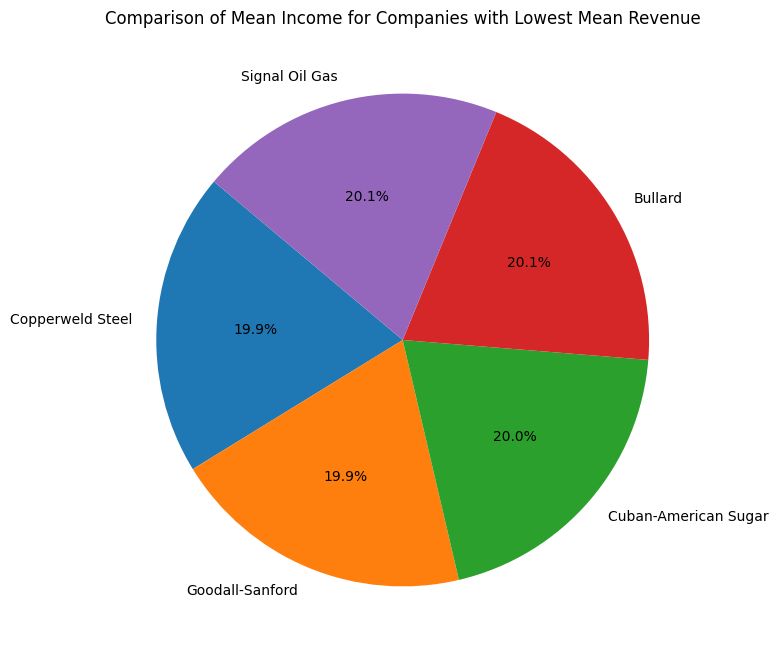

In [ ]:
least_revenue_year[:5]
import matplotlib.pyplot as plt

# Create a pie chart to compare companies in least_revenue_year[:5]
plt.figure(figsize=(8, 8))
plt.pie(least_revenue_year['MeanIncome'][:5], labels=least_revenue_year['Company'][:5], autopct='%1.1f%%', startangle=140)
plt.title('Comparison of Mean Income for Companies with Lowest Mean Revenue')
plt.show()

# Part 2

Note: When to use Variance and Standard Deviation

In [80]:
df = pd.read_csv('dataset/adult.csv')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
